# Problem 1

In [1]:
#Import the packages
import pandas as mypd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as myplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math as mymath
import seaborn as mysb
from sklearn.ensemble import RandomForestRegressor
import random
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
#Import the dataset
mydata = mypd.read_excel('/Users/sudiptarakshit/Desktop/ISI MS QMS/Sem2/MDA/Assignment/Assignment6/CPU_Data.xlsx')

In [3]:
#Explore the dataset
mydata.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [4]:
#Check the dataset
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


In the dataset, we have all the continuous variables.
We see that Features are MYCT, MMIN, MMAX, CACH, CHMIN, CHMAX
Response variable is PRP

We see that there is no missing value in the dataset. Also there are total 209 observations in the dataset.

In [5]:
#Separate x's and y
x = mydata.iloc[:,0:6]
y = mydata.iloc[:,6]

### Split the data randomly into training (80%) and test (20%)

We initialize the random number generator.

In [6]:
#Set seed
random.seed(100)

In [7]:
#Split the data into training (80%) and testing (20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [8]:
#Check the test/train split
x_train.count(), x_test.count()

(MYCT     167
 MMIN     167
 MMAX     167
 CACH     167
 CHMIN    167
 CHMAX    167
 dtype: int64,
 MYCT     42
 MMIN     42
 MMAX     42
 CACH     42
 CHMIN    42
 CHMAX    42
 dtype: int64)

train data has 167 observations & test data has 42 observations.

## Regression Tree Method (CART)

In [9]:
#Specify the default model
mymodel =tree.DecisionTreeRegressor(min_samples_split=20)

In [10]:
#Fit the model to training data
mymodel = mymodel.fit(x_train,y_train)

In [11]:
#Model accuarcy
accuracy = mymodel.score(x_train,y_train)
round(accuracy,3)

0.91

There may be an overfitting. We have to do hyper-parameter tuning for a more generalized model.

In [12]:
#Hyper parameter tuning
myparamgrid = [{'min_samples_split':[5,10,15,20,25,30,35]}]

In [13]:
# Set up search
mysearch = GridSearchCV(estimator=mymodel,param_grid=myparamgrid,scoring='neg_mean_squared_error',cv=5,verbose=True)

In [14]:
#Fit the search on training data
mysearch = mysearch.fit(X=x_train,y=y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [15]:
# Optimum parameter values
mysearch.best_params_

{'min_samples_split': 5}

In [16]:
# Specify the optimum model
mymodel = tree.DecisionTreeRegressor(min_samples_split=5)

In [17]:
# Fit the model to training data
mymodel = mymodel.fit(X=x_train,y=y_train)

In [18]:
# Check the model accuracy: R square
rsq = mymodel.score(x_train,y_train)
rsq

0.9508564048554378

There is some improvement in model accuracy after hyper parameter optimization, Also, there should be increase in model generalizability.

In [19]:
# Predicted Values
predy = mymodel.predict(X=x_train)

In [20]:
#Mean Square Error(MSE) on training data
mse = mean_squared_error(y_true=y_train,y_pred=predy)
mse

1152.7939121756485

In [21]:
# Root Mean Square Errorm(RMSE) on training data
rmse = mymath.sqrt(mse)
rmse

33.952818913540135

RMSE value is coming quite high though R<sup>2</sup> value is quite good.

This may be due to extreme values present in response variables. We draw box plot of the response variable PRP to validate the claim.


**PRP**

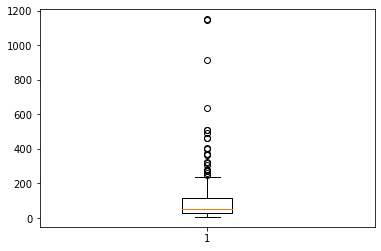

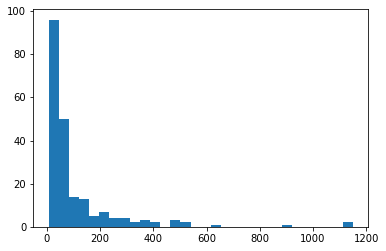

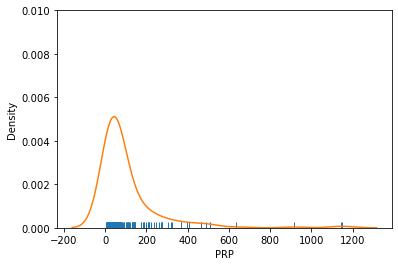

In [22]:
#Separate the PRP variable
PRP = mydata.PRP
#Box plot
myplot.boxplot(x=PRP)
myplot.show()
#Histogram
myplot.hist(x=PRP,bins=30)
myplot.show()
#Rug plot & KDE Plot
mysb.rugplot(x=PRP)
mysb.kdeplot(PRP)
myplot.ylim(0,0.01)
myplot.show()

So, though the overall model accuracy is good (95.08 %), we are getting high RMSE as some extreme values are present in the response variable.

**Applying the model on test data**

In [23]:
#Validate the model on test data
predtest = mymodel.predict(X=x_test)

In [24]:
#Accuracy of the model on test data - generalizability
test_accuracy = mymodel.score(X=x_test,y=y_test)
test_accuracy

0.8659110232400484

There is a drop of R<sup>2</sup> value from 95.08% to 86.59%. It shows model generalizability is not good.

In [25]:
#Mean Square Error(MSE) on test data
mse_test = mean_squared_error(y_true=y_test,y_pred=predtest)
mse_test

4669.696428571428

In [26]:
# Root Mean Square Errorm(RMSE) on test data
rmse_test = mymath.sqrt(mse_test)
rmse_test

68.33517709475427

We see that RMSE has increased on test data from 33.95 to 58.92. It shows model generalizability is not good.

| |Decision Tree Regressor Model(CART) | |
| ----------- | ----------- |----------- |
| | Train Data |Test Data |
| R-sq |95.08|86.59|
|MSE |1152.79 |4669.69|
|RMSE |33.95|68.33|


## Bagging Method

Bagging generally uses all the p predictors.

`max_features='auto'`

In [27]:
#Specify the bagging model
bag_model = RandomForestRegressor(n_estimators=500,min_samples_split=40,max_features='auto')

In [28]:
# Fit the bag model to the data
bag_model = bag_model.fit(x_train,y_train)

In [29]:
#Model accuarcy
rsq = bag_model.score(x_train,y_train)
rsq

0.790596078091145

In [30]:
#Hyper parameter tuning of the bagging model
myparamgrid = [{'n_estimators':[100,200,300,400,500,600],'min_samples_split':[5,10,15,20,25,30,35],'criterion':['mse','mae']}]

In [31]:
#Optimum search
mysearch = GridSearchCV(estimator=bag_model,param_grid=myparamgrid,scoring='neg_mean_squared_error', cv=5,verbose=True)

In [32]:
#Fit the search to data
mysearch = mysearch.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [33]:
# optimum parameters of bagging model
mysearch.best_params_

{'criterion': 'mse', 'min_samples_split': 5, 'n_estimators': 100}

In [34]:
#Specify the optimum bagging model
bag_model = RandomForestRegressor(n_estimators=100,min_samples_split=5,max_features='auto')

In [35]:
#Fit bagging model to training data
bag_model = bag_model.fit(x_train,y_train)

In [36]:
#Model accuracy
rsq = bag_model.score(X=x_train,y=y_train)
rsq

0.9526830985746105

We see that there is very significant improvement in model accuracy after hyperparameter optimization.

In [37]:
#Predict the response
predy = bag_model.predict(x_train)

In [38]:
#MSE
mse = mean_squared_error(y_true=y_train,y_pred=predy)
print(mse)
#RMSE
rmse = mymath.sqrt(mse)
print(rmse)

1109.9439458132504
33.31582125377146


**Applying the model on test data**

In [39]:
#Accuracy for test data
rsq_test = bag_model.score(X=x_test,y=y_test)
rsq_test

0.8219424862087524

Model accuracy has reduced from 95.25% to 84.28% on test data.

In [40]:
#Predict for test data
predtest = bag_model.predict(x_test)

In [41]:
#Test MSE
msetest = mean_squared_error(y_true=y_test,y_pred=predtest)
print(msetest)
#Test RMSE
rmsetest = mymath.sqrt(msetest)
print(rmsetest)

6200.916408809775
78.74589772686431


There is a very significant increase in RMSE value on test data as compared to train data.

| |Bagging Model | |
| ----------- | ----------- |----------- |
| | Train Data |Test Data |
| R-sq |95.26|82.19|
|MSE |1109.94 |6200.91|
|RMSE |33.31 |78.75|


## Random Forest Model

Random forest uses sqrt(P) predictors.

`max_features='sqrt'`

In [42]:
#Specify the randomforest model
rf_model = RandomForestRegressor(n_estimators=500,min_samples_split=40,max_features='sqrt')

In [43]:
#Fit the model to the data
rf_model = rf_model.fit(x_train,y_train)

In [44]:
#Model accuarcy
rsq = bag_model.score(x_train,y_train)
rsq

0.9526830985746105

In [45]:
#Hyper parameter Tuning of Random Forest model
myparamgrid = [{'n_estimators': [100,200,300,400,500,600],'min_samples_split': [5,10,15,20,25,30,35], 'criterion':['mse','mae']}]

In [46]:
#Set up the search
mysearch = GridSearchCV(estimator=rf_model,param_grid=myparamgrid,scoring='neg_mean_squared_error',cv=5,verbose=True)

In [47]:
#Fit the search to the data
mysearch = mysearch.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [48]:
#Optimum parameters of the random forest model
mysearch.best_params_

{'criterion': 'mse', 'min_samples_split': 5, 'n_estimators': 300}

In [49]:
#Specify the optimum random forest model
rf_model = RandomForestRegressor(n_estimators=100,min_samples_split=5,max_features='sqrt')

In [50]:
#Fit the model to data
rf_model = rf_model.fit(x_train,y_train)

In [51]:
#Model accuracy
rsq = rf_model.score(x_train,y_train)
print(rsq)

0.9540904644195625


In [52]:
#Predict the response
predy = rf_model.predict(X=x_train)

In [53]:
#Compute MSE
mse = mean_squared_error(y_true=y_train,y_pred=predy)
print(mse)
#Compute RMSE
rmse = mymath.sqrt(mse)
print(rmse)

1076.9304315701015
32.816618222633814


**Applying the model on test data**

In [54]:
#Accuracy on test data
rsq_test = rf_model.score(x_test,y_test)
rsq_test

0.8289729524404916

In [55]:
# Predict on test data
predtest = rf_model.predict(X=x_test)

In [56]:
#Test MSE
msetest = mean_squared_error(y_true=y_test,y_pred=predtest)
msetest

5956.0779153941885

In [57]:
#Test RMSE
rmsetest = mymath.sqrt(msetest)
rmsetest

77.17563032067952

| |Random forest Model | |
| ----------- | ----------- |----------- |
| | Train Data |Test Data |
| R-sq |95.40|82.90|
|MSE |1076.93 |5956.08|
|RMSE |32.87 |77.17|


We find that model generalizability is not good.

**We comapare all three models**

| |Bagging Model |  |Random Forest| |CART| |
| ----------- | ----------- |----------- | ----------- |----------- |----------- |----------- |
| | Train Data |Test Data |Train Data |Test Data |Train Data |Test Data |
| R-sq |95.08|86.59|95.26|82.19|95.40|82.90|
|MSE |1152.79 |4669.69|1109.94 |6200.91|1076.93|5956.08|
|RMSE |33.95 |68.335|33.31 |78.75|32.87|77.17|


## Linear Regression model

We will build linear regression model on the dataset. We create train and test dataframes.


In [58]:
#Train data: Joining x_train & y_train
train_data = x_train.join(y_train)
#Test data: Joining x_test & y_test
test_data = x_test.join(y_test)

In [59]:
#Check the train data
train_data.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
115,185,2000,16000,16,1,6,76
85,140,2000,4000,0,3,6,29
32,50,2620,10480,30,12,24,32
101,115,512,6000,16,1,6,45
26,320,256,6000,0,1,6,33


In [60]:
#Develop regression model
mymodel = ols(formula='PRP~MYCT+MMIN+MMAX+CACH+CHMIN+CHMAX',data = train_data).fit()

In [61]:
#Model summary
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.61e-79
Time:                        23:30:20   Log-Likelihood:                -879.59
No. Observations:                 167   AIC:                             1773.
Df Residuals:                     160   BIC:                             1795.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.0220      7.289     -6.040      0.000     -58.417     -29.627
MYCT           0.0370      0.016      2.334      0.021       0.006       0.068
MMIN           0.0178      0.002     11.698      0.000       0.015       0.021
MMAX           0.0050      0.001      8.861      0.000       0.004       0.006
CACH           0.3465      0.123      2.822      0.005       0.104       0.589
CHMIN          1.1760      0.741      1.587      0.115      -0.288       2.640
CHMAX          0.9286      0.197      4.714      0.000       0.540       1.318
==============================================================================
Omnibus:                       78.454   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.707
Skew:                           1.426   Prob(JB):                    9.69e-164
Kurtosis:                      12.987   Cond. No.                     3.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**P value for the variable CHMIN is >0.05. We remove this feature from the model.**

In [62]:
#Develop new regression model
mymodel = ols(formula='PRP~MYCT+MMIN+MMAX+CACH+CHMAX',data=train_data).fit()

In [63]:
#Check the model
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     305.8
Date:                Mon, 02 May 2022   Prob (F-statistic):           3.03e-80
Time:                        23:30:20   Log-Likelihood:                -880.89
No. Observations:                 167   AIC:                             1774.
Df Residuals:                     161   BIC:                             1792.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.9194      7.323     -5.998      0.000     -58.381     -29.458
MYCT           0.0364      0.016      2.288      0.023       0.005       0.068
MMIN           0.0182      0.002     12.014      0.000       0.015       0.021
MMAX           0.0051      0.001      9.038      0.000       0.004       0.006
CACH           0.3964      0.119      3.324      0.001       0.161       0.632
CHMAX          1.0489      0.183      5.742      0.000       0.688       1.410
==============================================================================
Omnibus:                       61.351   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.859
Skew:                           1.072   Prob(JB):                    9.48e-108
Kurtosis:                      11.138   Cond. No.                     3.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model**

`PRP = -43.9194 + 0.0364*MYCT + 0.0182*MMIN + 0.0051*MMAX + 0.3964*CACH + 1.0489*CHMAX`

---
**comment**
Here R<sup>2</sup> and R<sup>2</sup> <sub>Adj</sub> remains almost same after removing CHMIN variable. It means CHMIN variable was very least significant.

---

**Model significance**

p value of F statistics = 3.03e-80 which is <0.05.So, we can say that model is significant.



R<sup>2</sup> >0.6

R<sup>2</sup> <sub>Adj</sub>>0.6

So, the model accuaracy is good.

In [64]:
# we find the predicted values
predy = mymodel.predict()

**Model adequacy check**

In [65]:
#Calculate the residuals
res = mymodel.resid

In [66]:
# We check the normality of the residuals
stats.normaltest(res).pvalue

4.762894997963759e-14

We find that Residuals are not normally distributed as p value <0.05.

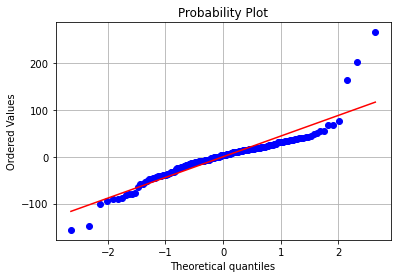

In [67]:
#We plot the Residuals in normal probability plot
stats.probplot(res,plot=myplot)
myplot.grid()
myplot.show()

We also find that in the q-q plot, points are not falling on the diagonal.

So, we can tell that residuals are not normally distributed.

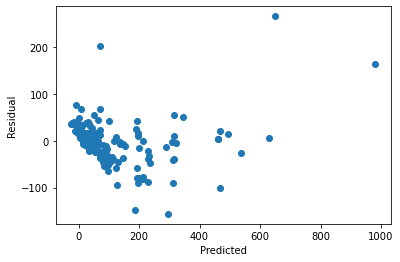

In [68]:
#Residual vs Predicted plot
myplot.scatter(x=predy,y=res)
myplot.xlabel('Predicted')
myplot.ylabel('Residual')
myplot.show()

We find that residual vs predicted not uniformly dispersed. So, againg the model is not a good model.

**Model is not adequate**

In [69]:
#Compute MSE on training data
mse = mean_squared_error(y_true=y_train,y_pred=predy)
print(mse)
#Compute RMSE
rmse = mymath.sqrt(mse)
print(rmse)

2234.476622703269
47.270250927018246


**Applying the model on test data**

In [70]:
# we find the predicted values on test data
predtest = mymodel.predict(x_test)

In [74]:
#Compute MSE on test data
mse = mean_squared_error(y_true=y_test,y_pred=predtest)
print(mse)
#Compute RMSE on test data
rmse = mymath.sqrt(mse)
print(rmse)

9903.626274219612
99.51696475586267


Test data Residual Sum of Square = (Test data MSE) * (Number of datapoints)


In [79]:
#Number of data points in test data
n = y_test.count()

In [80]:
#Test data Residual Sum of Squares
RSS_test = mse*n

In [81]:
#Total Sum of square of test data
Total_SS = y_test.var()*(n-1)

In [82]:
#Test data R square
rsq_test = 1 - RSS_test/Total_SS
rsq_test

0.7156202477750064

| |Linear Regression Model | |
| ----------- | ----------- |----------- |
| | Train Data |Test Data |
| R-sq |90.5|71.56|
|MSE |2234.47 |9903.62|
|RMSE |47.27 |99.51|


So, when we compare linear regrassion model with other CART, RandomForest, Bagging model, we see that for linear regrassion model there is a maximum reduction in R<sup>2</sup> value from train data to test data.